## Import e funções

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()
sns.set_style('whitegrid')

In [13]:
replace_map = {
    'TP_SITUACAO': {2: "Cursando",
                    3: "Matrícula trancada",
                    4: "Desvinculado do curso",
                    5: "Transferido para outro \n curso da mesma IES",
                    6: "Formado",
                    7: "Falecido"},
    'TP_SEXO' : {1: "Feminino", 2: "Masculino"},
    'TP_CATEGORIA_ADMINISTRATIVA': {
                1: "Pública Federal",
                2: "Pública Estadual",
                3: "Pública Municipal",
                4: "Privada com fins lucrativos",
                5: "Privada sem fins lucrativos",
                6: "Privada - Particular em sentido estrito",
                7: "Especial",
                8: "Privada comunitária",
                9: "Privada confessional"
              },
  'TP_ESCOLARIDADE': {
              1: "Sem graduação",
              2: "Graduação",
              3: "Especialização",
              4: "Mestrado",
              5: "Doutorado"                 
            }  
}

In [4]:
df_docente = pd.read_csv('../Data/docente_limpo.csv')
df_docente.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_DOCENTE_IES,ID_DOCENTE,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,...,IN_ATUACAO_POS_EAD,IN_ATUACAO_POS_PRESENCIAL,IN_ATUACAO_SEQUENCIAL,IN_ATUACAO_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DATA_REFERENCIA,IN_VISITANTE,TP_VISITANTE_IFES_VINCULO,NO_IES
0,2015,10323,4,3,875876,A0BC2DD82CDC174E4779DED86ED7ACB7,1,3,4.0,2,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,BANDTEC
1,2015,838,5,3,210430,8F77251C3BCD09A418F9913C0563D853,1,5,4.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,FCTFOR
2,2015,15236,4,3,348775,532CCE622CCC952253F64A04C932727B,1,3,3.0,1,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC
3,2015,15236,4,3,348777,8BC9813BD252C2ED02BA83A14987605D,1,3,4.0,2,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC
4,2015,15236,4,3,348776,7EC790656E1811CF5C374BF4E12603CC,1,3,4.0,1,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC


In [5]:
df_docente.NO_IES.unique()

array(['BANDTEC', 'FCTFOR', 'AMTEC', 'FACOMP', 'FACJK', 'COTEMIG',
       'FATEC\n EDUVALE', 'FAETERJ\n PETRÓPOLIS', 'FAETERJ\nR DE JANEIRO',
       'FATI', 'ROGA'], dtype=object)

In [6]:
df_aluno = pd.read_csv('../Data/alunos_curso_2015_2019_tic_br.csv')
df_aluno.head()

/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_19554/610393052.py:1: DtypeWarning: Columns (10,11,41,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aluno = pd.read_csv('../Data/alunos_curso_2015_2019_tic_br.csv')


,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO,CO_UF,NO_CURSO,SG_IES
0,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,0.0,0.0,0.0,NaN,0.0,2006.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR
1,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,0.0,0.0,NaN,0.0,2005.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR
2,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,0.0,0.0,NaN,0.0,2005.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR
3,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,0.0,0.0,NaN,0.0,2006.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR
4,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,0.0,0.0,NaN,0.0,2006.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR


## Limpando dados de alunos para apenas os das instituições analisadas

In [8]:
df_aluno = df_aluno.loc[df_aluno.CO_IES.isin(df_docente.CO_IES.unique().tolist())]

In [10]:
df_aluno = df_aluno.loc[df_aluno.NU_ANO_CENSO >= 2015]

In [11]:
df_aluno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15376 entries, 2813173 to 5220935
Columns: 108 entries, NU_ANO_CENSO to SG_IES
dtypes: float64(101), int64(2), object(5)
memory usage: 12.8+ MB


In [20]:
mapa_unis = {
 838: 'FCTFOR',
 1330: 'COTEMIG',
 3299: 'FATI',
 3657: 'FACOMP',
 4043: 'FATEC\n EDUVALE',
 4173: 'FACJK',
 4199: 'ROGA',
 5016: 'FAETERJ\nR DE JANEIRO',
 5017: 'FAETERJ\n PETRÓPOLIS',
 10323: 'BANDTEC',
 15236: 'AMTEC'}
df_aluno['NO_IES'] = df_aluno.CO_IES.map(mapa_unis)

In [12]:
df_aluno.to_csv('../Data/aluno_limpo.csv', index=False)

TP_SEXO                Feminino  Masculino
NO_IES                                    
AMTEC                        15         82
BANDTEC                      23         72
COTEMIG                      14         73
FACJK                        18        100
FACOMP                       35         60
FAETERJ\n PETRÓPOLIS         32        106
FAETERJ\nR DE JANEIRO        32         92
FATEC\n EDUVALE               5         47
FATI                         23         44
FCTFOR                       26         45
ROGA                         10         49
[97, 95, 87, 118, 95, 138, 124, 52, 67, 71, 59] [233, 770]
TP_SEXO                 Feminino  Masculino
NO_IES                                     
AMTEC                  15.463918  84.536082
BANDTEC                24.210526  75.789474
COTEMIG                16.091954  83.908046
FACJK                  15.254237  84.745763
FACOMP                 36.842105  63.157895
FAETERJ\n PETRÓPOLIS   23.188406  76.811594
FAETERJ\nR DE JANEIRO  25.8064

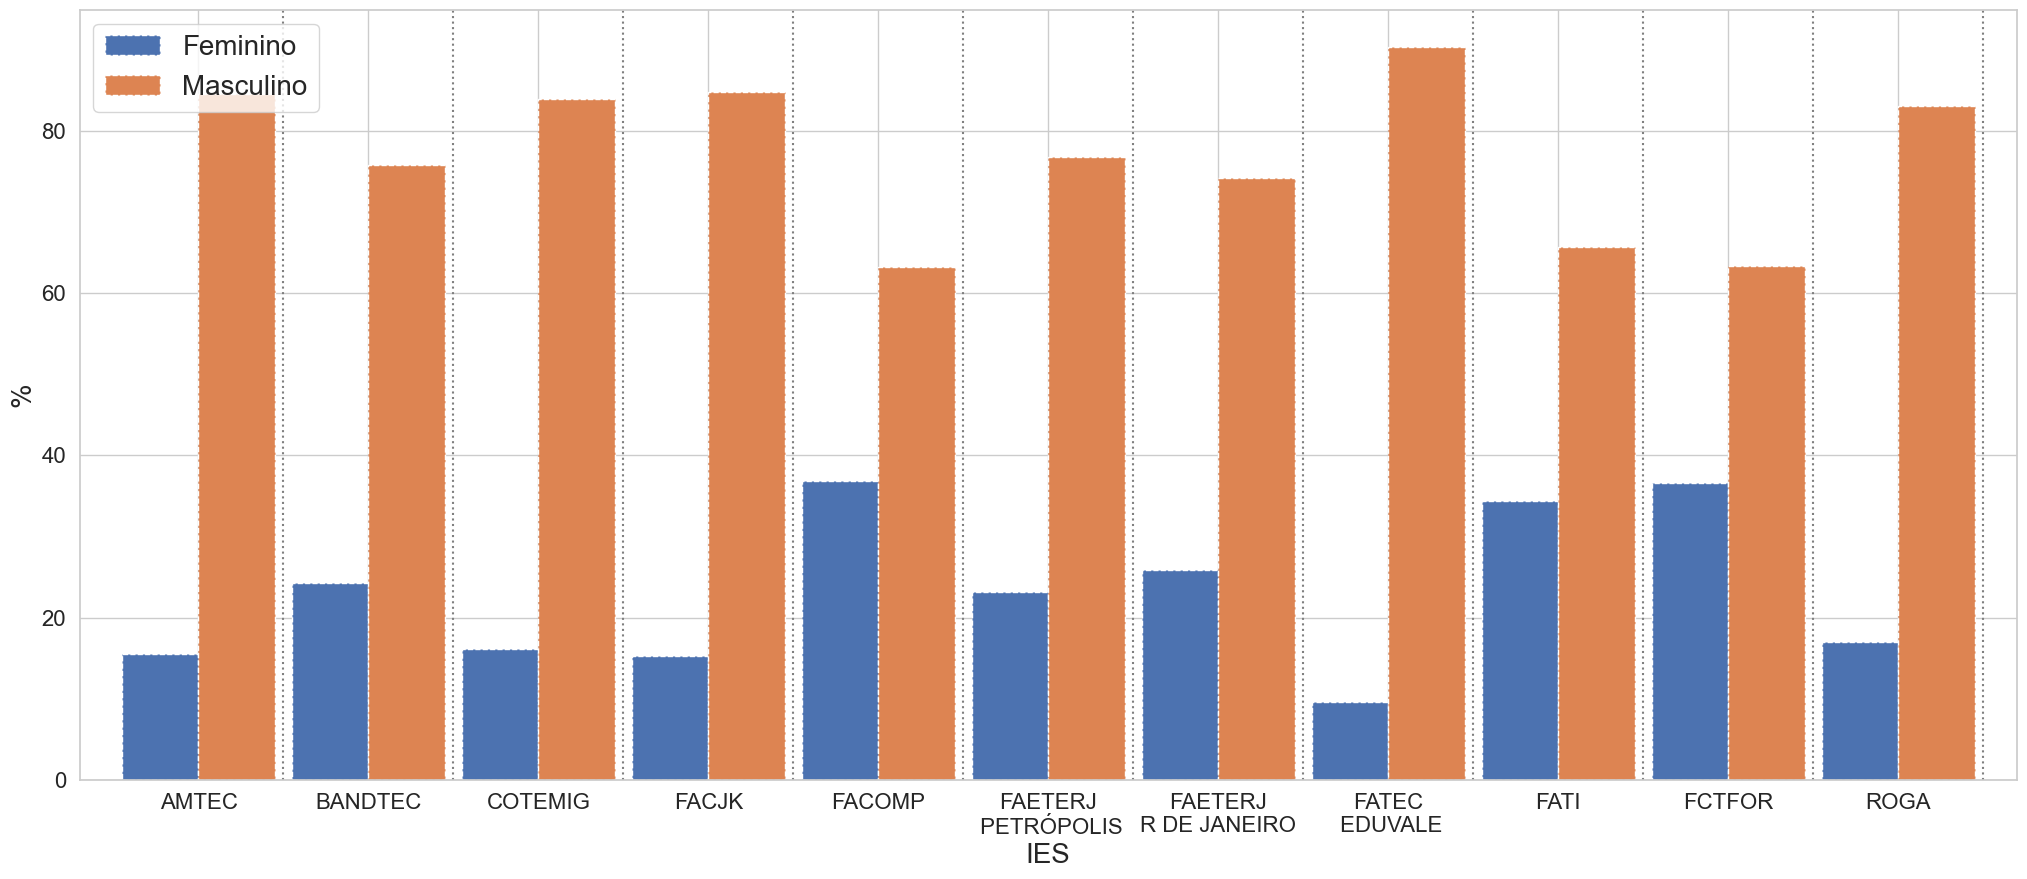

In [31]:
df = df_docente[['NO_IES', 'TP_SEXO']]
param1, param2 =['NO_IES', 'TP_SEXO']
param3, param4 = ['%', 'IES']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified_docente_abs = data.groupby(param2)[param1].value_counts().unstack(0)
data_modified_docente = data_modified_docente_abs.copy()
print(data_modified_docente)
totais = []
totais_categoria = []
for c in data_modified_docente.columns:
    totais.append(data_modified_docente[c].sum())
for c in data_modified_docente.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified_docente.index):
    data_modified_docente.loc[[index]] = 100*(data_modified_docente.loc[[index]] / totais_categoria[enum])
    # data_modified_docente[data_modified_docente.columns[i]] = 100*(data_modified_docente[data_modified_docente.columns[i]] / sum(totais))
# data_modified_docente[data_modified_docente.columns[i]] = data_modified_docente[data_modified_docente.columns[i]] / totais[i]
print(data_modified_docente)
data_modified_docente.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

TP_SEXO                Feminino  Masculino
NO_IES                                    
AMTEC                        77        754
BANDTEC                     255       1308
COTEMIG                     185       1218
FACJK                       110        652
FACOMP                      128        796
FAETERJ\n PETRÓPOLIS        323       1707
FAETERJ\nR DE JANEIRO       343       1466
FATEC\n EDUVALE              46        326
FATI                         15        124
FCTFOR                       35        252
ROGA                         22        249
[831, 1563, 1403, 762, 924, 2030, 1809, 372, 139, 287, 271] [1539, 8852]
TP_SEXO                 Feminino  Masculino
NO_IES                                     
AMTEC                   9.265945  90.734055
BANDTEC                16.314779  83.685221
COTEMIG                13.186030  86.813970
FACJK                  14.435696  85.564304
FACOMP                 13.852814  86.147186
FAETERJ\n PETRÓPOLIS   15.911330  84.088670
FAETERJ\nR DE JA

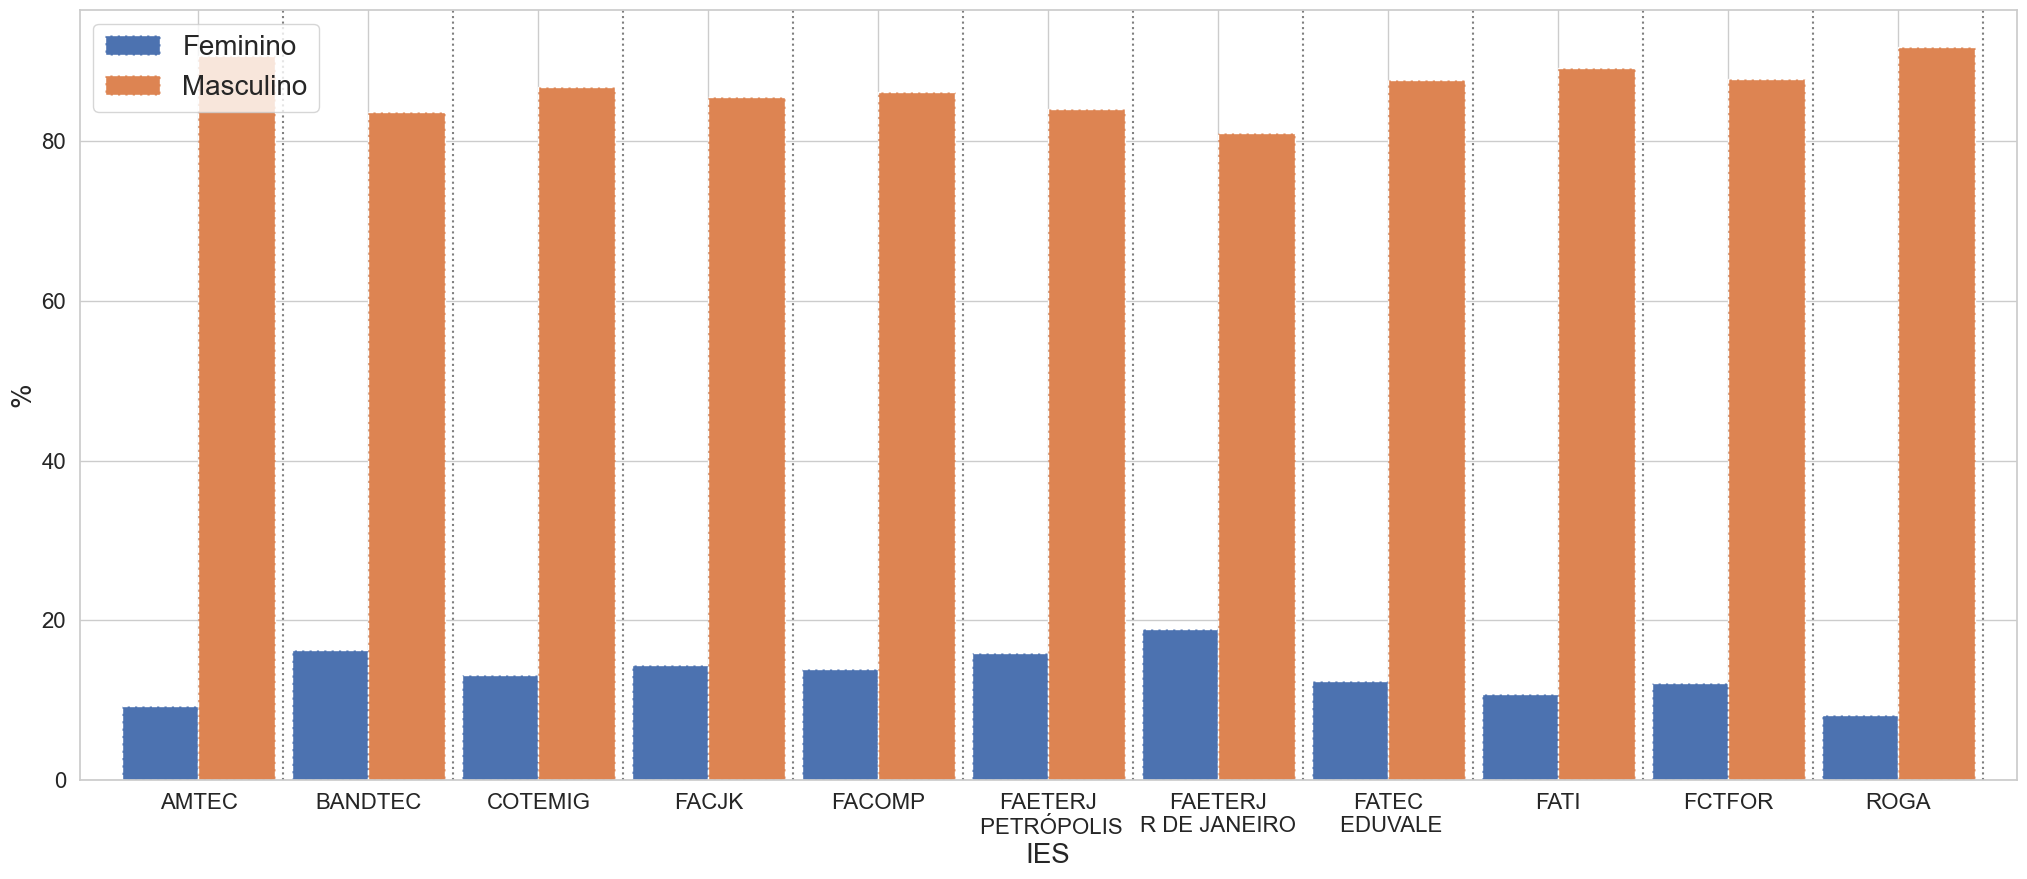

In [163]:
df_aluno_ativo = df_aluno.loc[df_aluno.TP_SITUACAO.isin([2, 6])]
df = df_aluno_ativo[['NO_IES', 'TP_SEXO']]
param1, param2 =['NO_IES', 'TP_SEXO']
param3, param4 = ['%', 'IES']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified_aluno_abs = data.groupby(param2)[param1].value_counts().unstack(0)
data_modified_aluno = data_modified_aluno_abs.copy()
print(data_modified_aluno)
totais = []
totais_categoria = []
for c in data_modified_aluno.columns:
    totais.append(data_modified_aluno[c].sum())
for c in data_modified_aluno.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified_aluno.index):
    data_modified_aluno.loc[[index]] = 100*(data_modified_aluno.loc[[index]] / totais_categoria[enum])
    # data_modified_aluno[data_modified_aluno.columns[i]] = 100*(data_modified_aluno[data_modified_aluno.columns[i]] / sum(totais))
# data_modified_aluno[data_modified_aluno.columns[i]] = data_modified_aluno[data_modified_aluno.columns[i]] / totais[i]
print(data_modified_aluno)
data_modified_aluno.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

In [22]:
data_modified_docente

TP_SEXO,Feminino,Masculino
NO_IES,,
AMTEC,15.463918,84.536082
BANDTEC,24.210526,75.789474
COTEMIG,16.091954,83.908046
FACJK,15.254237,84.745763
FACOMP,36.842105,63.157895
FAETERJ\n PETRÓPOLIS,23.188406,76.811594
FAETERJ\nR DE JANEIRO,25.806452,74.193548
FATEC\n EDUVALE,9.615385,90.384615
FATI,34.328358,65.671642


In [60]:
data_modified_aluno

TP_SEXO,Feminino,Masculino
NO_IES,,
AMTEC,9.265945,90.734055
BANDTEC,16.314779,83.685221
COTEMIG,13.186030,86.813970
FACJK,14.435696,85.564304
FACOMP,13.852814,86.147186
FAETERJ\n PETRÓPOLIS,15.911330,84.088670
FAETERJ\nR DE JANEIRO,18.960752,81.039248
FATEC\n EDUVALE,12.365591,87.634409
FATI,10.791367,89.208633


In [61]:
relacao_docente_aluno = data_modified_aluno.join(data_modified_docente.add_suffix('_doc'))
relacao_docente_aluno

TP_SEXO,Feminino,Masculino,Feminino_doc,Masculino_doc
NO_IES,,,,
AMTEC,9.265945,90.734055,15.463918,84.536082
BANDTEC,16.314779,83.685221,24.210526,75.789474
COTEMIG,13.186030,86.813970,16.091954,83.908046
FACJK,14.435696,85.564304,15.254237,84.745763
FACOMP,13.852814,86.147186,36.842105,63.157895
FAETERJ\n PETRÓPOLIS,15.911330,84.088670,23.188406,76.811594
FAETERJ\nR DE JANEIRO,18.960752,81.039248,25.806452,74.193548
FATEC\n EDUVALE,12.365591,87.634409,9.615385,90.384615
FATI,10.791367,89.208633,34.328358,65.671642


In [157]:
def grafico_comparacao_linha(data,coluna_x, coluna_y):
        data.sort_values(by=[coluna_x]).plot.line(x=coluna_x, y=coluna_y)
        x = data[coluna_x]
        y = data[coluna_y]
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        print(p)
        plt.plot(x,p(x),"r--")
        plt.ylabel(coluna_y + ' (%)')
        plt.xlabel(coluna_x + ' (%)')

 
0.05652 x + 11.91


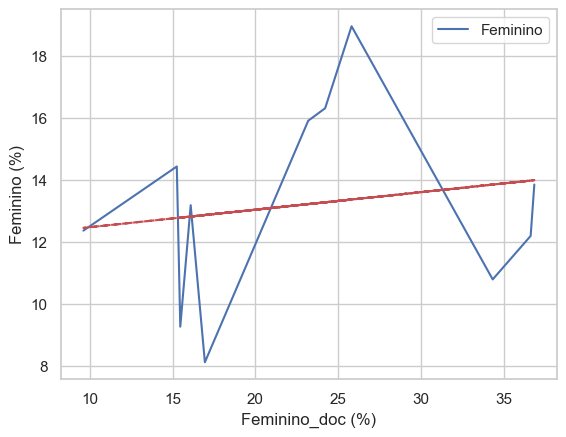

In [191]:
grafico_comparacao_linha(relacao_docente_aluno,'Feminino_doc', 'Feminino')

In [164]:
relacao_docente_aluno_abs = data_modified_aluno_abs.join(data_modified_docente_abs.add_suffix('_doc'))
relacao_docente_aluno_abs

TP_SEXO,Feminino,Masculino,Feminino_doc,Masculino_doc
NO_IES,,,,
AMTEC,77,754,15,82
BANDTEC,255,1308,23,72
COTEMIG,185,1218,14,73
FACJK,110,652,18,100
FACOMP,128,796,35,60
FAETERJ\n PETRÓPOLIS,323,1707,32,106
FAETERJ\nR DE JANEIRO,343,1466,32,92
FATEC\n EDUVALE,46,326,5,47
FATI,15,124,23,44


 
0.04494 x + 14.89


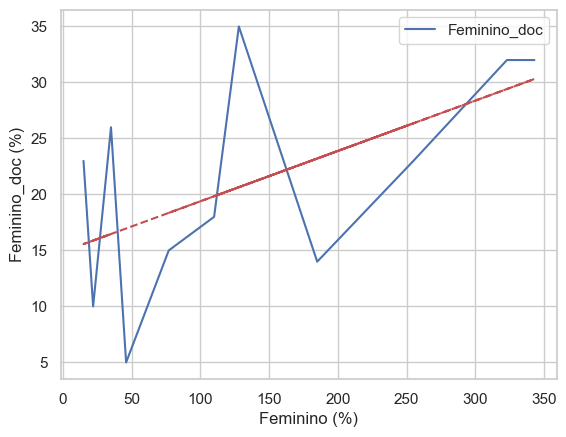

In [165]:
grafico_comparacao_linha(relacao_docente_aluno_abs,'Feminino', 'Feminino_doc')

TP_SEXO                                       Feminino  Masculino
TP_SITUACAO                                                      
Cursando                                        1275.0     7494.0
Desvinculado do curso                            492.0     2777.0
Falecido                                           0.0       13.0
Formado                                          264.0     1358.0
Matrícula trancada                               275.0     1360.0
Transferido para outro \n curso da mesma IES      10.0       58.0
[8769.0, 3269.0, 13.0, 1622.0, 1635.0, 68.0] [2316.0, 13060.0]
TP_SEXO                                        Feminino   Masculino
TP_SITUACAO                                                        
Cursando                                      14.539856   85.460144
Desvinculado do curso                         15.050474   84.949526
Falecido                                       0.000000  100.000000
Formado                                       16.276202   83.723798
M

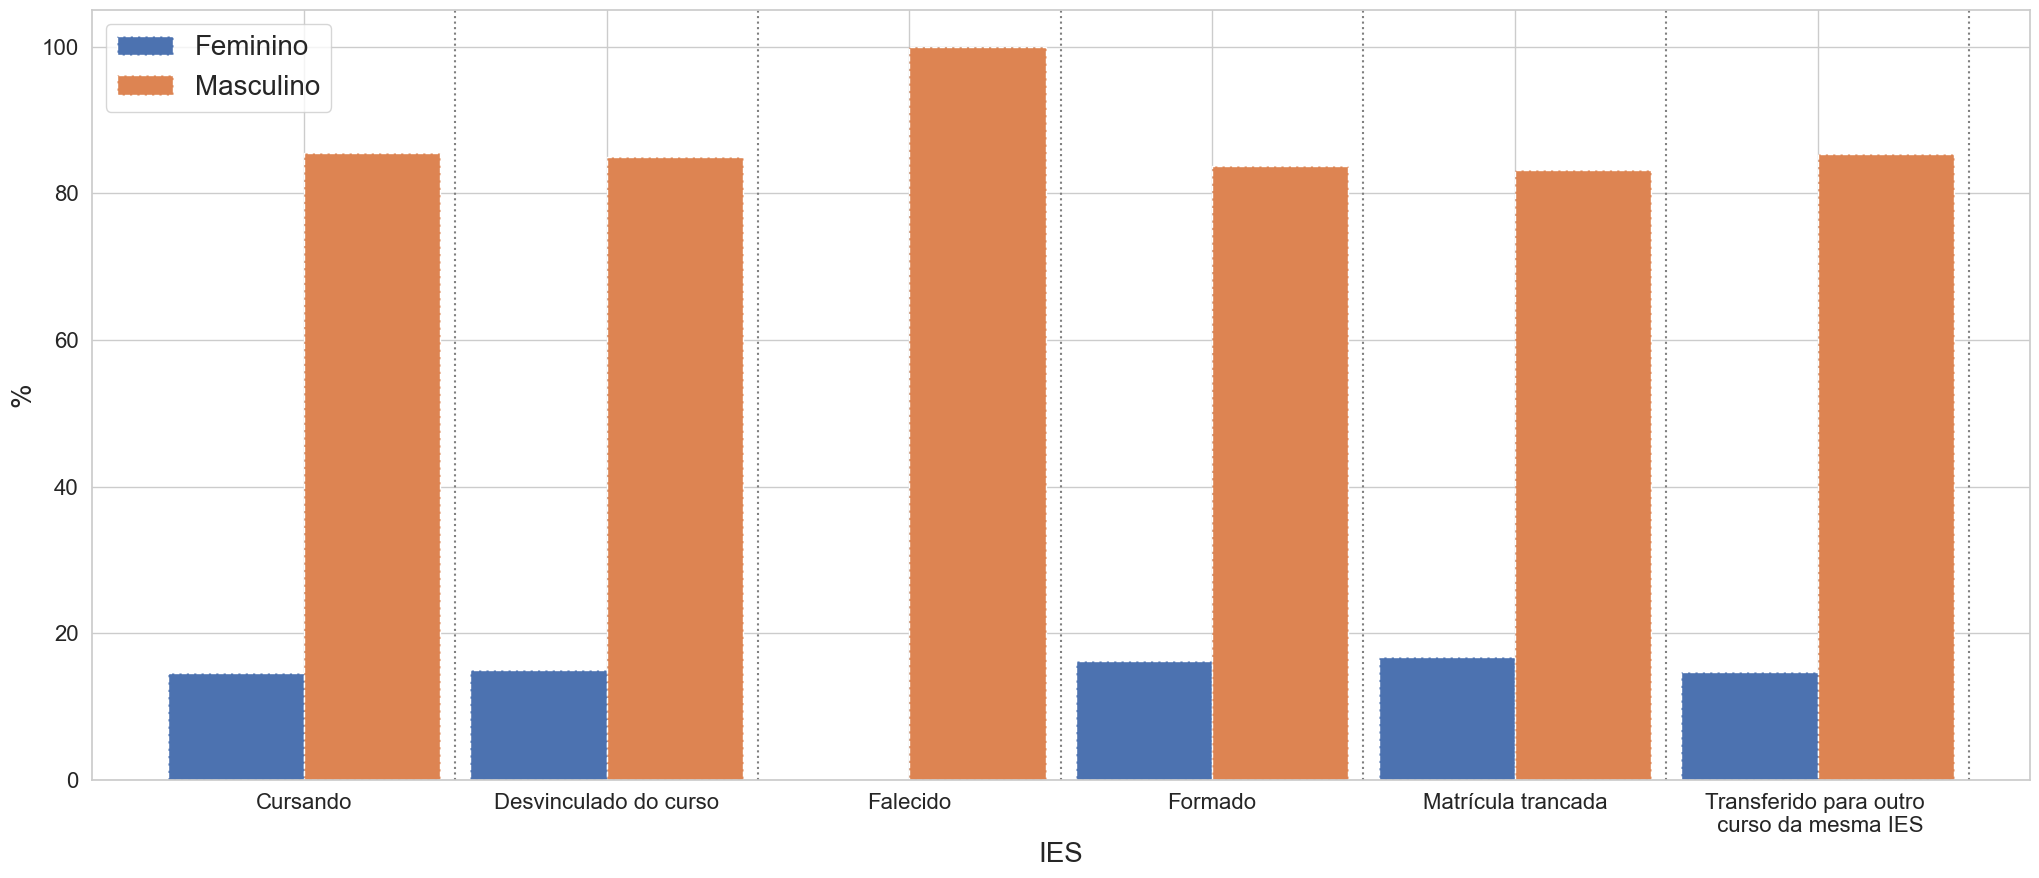

In [166]:
df = df_aluno[['TP_SITUACAO', 'TP_SEXO']]
param1, param2 =['TP_SITUACAO', 'TP_SEXO']
param3, param4 = ['%', 'IES']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified_aluno_abs = data.groupby(param2)[param1].value_counts().unstack(0)
data_modified_aluno = data_modified_aluno_abs.copy()
data_modified_aluno.fillna(0, inplace=True)
print(data_modified_aluno)
totais = []
totais_categoria = []
for c in data_modified_aluno.columns:
    totais.append(data_modified_aluno[c].sum())
for c in data_modified_aluno.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified_aluno.index):
    data_modified_aluno.loc[[index]] = 100*(data_modified_aluno.loc[[index]] / totais_categoria[enum])
    # data_modified_aluno[data_modified_aluno.columns[i]] = 100*(data_modified_aluno[data_modified_aluno.columns[i]] / sum(totais))
# data_modified_aluno[data_modified_aluno.columns[i]] = data_modified_aluno[data_modified_aluno.columns[i]] / totais[i]
print(data_modified_aluno)
data_modified_aluno.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

Pegando apenas as mulheres para verificar a porcentagem de mulheres em cada instituição por situação, então, dos alunos que estão cursando na AMTEC, menos de 10% são mulheres

TP_SITUACAO             Cursando  Desvinculado do curso    Formado  \
NO_IES                                                               
AMTEC                   9.399478              14.325843   7.692308   
BANDTEC                16.887710               8.796296  14.814815   
COTEMIG                12.818336              11.780822  15.111111   
FACJK                  13.286713              15.294118  17.894737   
FACOMP                 11.688312               7.865169  20.346320   
FAETERJ\n PETRÓPOLIS   15.723613              20.816327  17.708333   
FAETERJ\nR DE JANEIRO  18.816568              21.869783  21.008403   
FATEC\n EDUVALE        12.383901               9.259259  12.244898   
FATI                   10.317460               7.812500  15.384615   
FCTFOR                 12.000000              15.929204  13.513514   
ROGA                    6.930693              15.555556  11.594203   

TP_SITUACAO            Matrícula trancada  \
NO_IES                                      

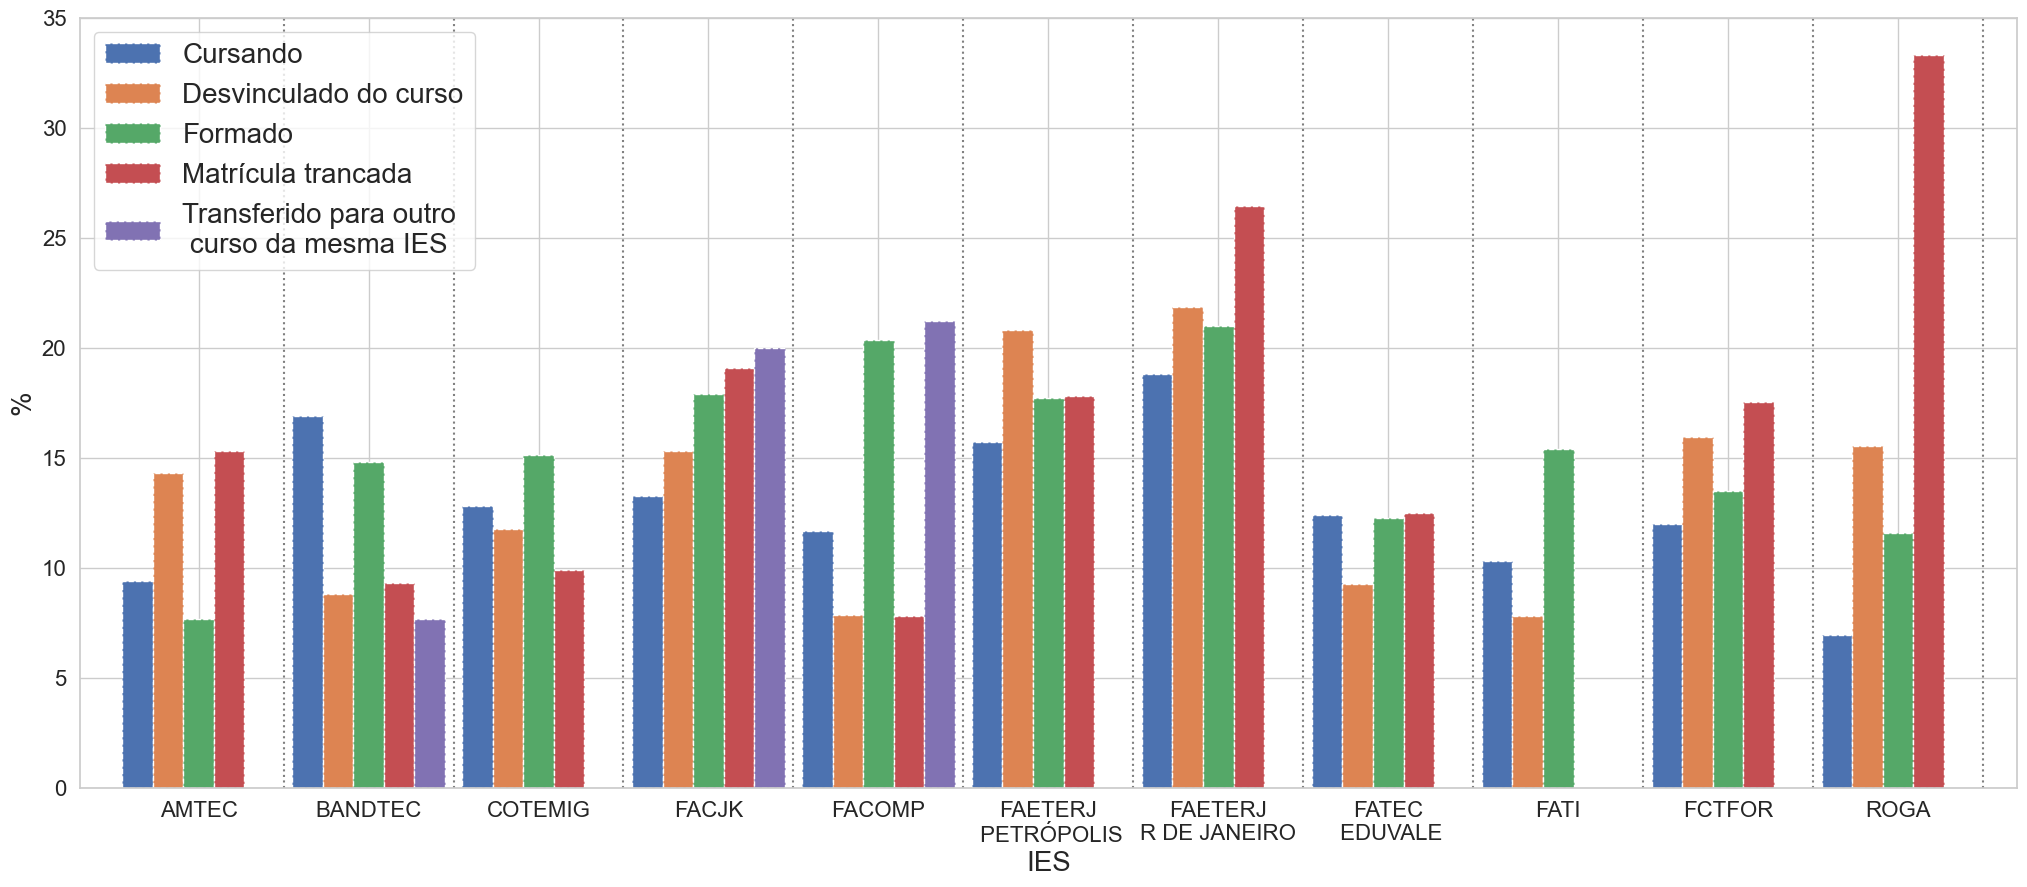

In [189]:
df_aluno_mulheres = df_aluno.loc[df_aluno.TP_SEXO == 1]
df = df_aluno_mulheres[['NO_IES','TP_SITUACAO']]
param1, param2 =['NO_IES','TP_SITUACAO']
param3, param4 = ['%', 'IES']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified_aluno_abs = data.groupby(param2)[param1].value_counts().unstack(0)
data_modified_aluno_abs.fillna(0, inplace=True)
data_modified_aluno = data_modified_aluno_abs.copy()
# print(data_modified_aluno)
totais = []
totais_categoria = []

totais_categoria = [8769.0, 3269.0, 1622.0, 1635.0, 68.0]
# print(totais_categoria)
for enum,column in enumerate(data_modified_aluno.columns):
    for enum,index in enumerate(data_modified_aluno.index):
      totais_categoria_unis = df_aluno.loc[(df_aluno.replace(replace_map)[param2] == column) &
                                          (df_aluno.replace(replace_map)[param1] == index)] \
                                          .count()[param2]
      # print(data_modified_aluno.loc[[index]][column].values[0], totais_categoria_unis)
      qt_alunas = data_modified_aluno.loc[[index]][column].values[0] 
      if qt_alunas != 0:
        # print(qt_alunas, index, column)
        data_modified_aluno.at[index, column] = 100*(qt_alunas / totais_categoria_unis)

print(data_modified_aluno)
data_modified_aluno.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

#### Gráficos de relação situação com porcentagem de docentes mulheres

In [182]:
relacao_docente_situacao = data_modified_aluno.join(data_modified_docente.add_suffix('_doc'))
relacao_docente_situacao

,Cursando,Desvinculado do curso,Formado,Matrícula trancada,Transferido para outro \n curso da mesma IES,Feminino_doc,Masculino_doc
NO_IES,,,,,,,
AMTEC,9.399478,14.325843,7.692308,15.306122,0.000000,15.463918,84.536082
BANDTEC,16.887710,8.796296,14.814815,9.302326,7.692308,24.210526,75.789474
COTEMIG,12.818336,11.780822,15.111111,9.917355,0.000000,16.091954,83.908046
FACJK,13.286713,15.294118,17.894737,19.105691,20.000000,15.254237,84.745763
FACOMP,11.688312,7.865169,20.346320,7.812500,21.212121,36.842105,63.157895
FAETERJ\n PETRÓPOLIS,15.723613,20.816327,17.708333,17.804552,0.000000,23.188406,76.811594
FAETERJ\nR DE JANEIRO,18.816568,21.869783,21.008403,26.428571,0.000000,25.806452,74.193548
FATEC\n EDUVALE,12.383901,9.259259,12.244898,12.500000,0.000000,9.615385,90.384615
FATI,10.317460,7.812500,15.384615,0.000000,0.000000,34.328358,65.671642


 
-0.3196 x + 22.76


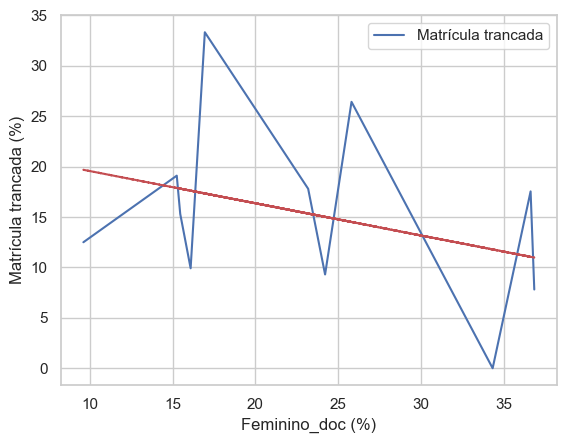

In [183]:
grafico_comparacao_linha(relacao_docente_situacao,'Feminino_doc','Matrícula trancada')

 
0.03448 x + 11.95


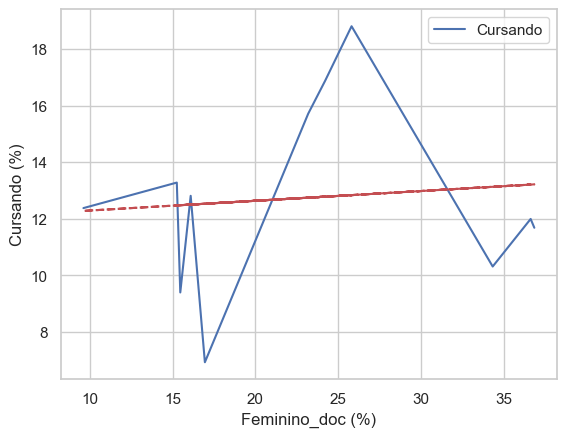

In [184]:
grafico_comparacao_linha(relacao_docente_situacao,'Feminino_doc','Cursando')

 
-0.06055 x + 14.97


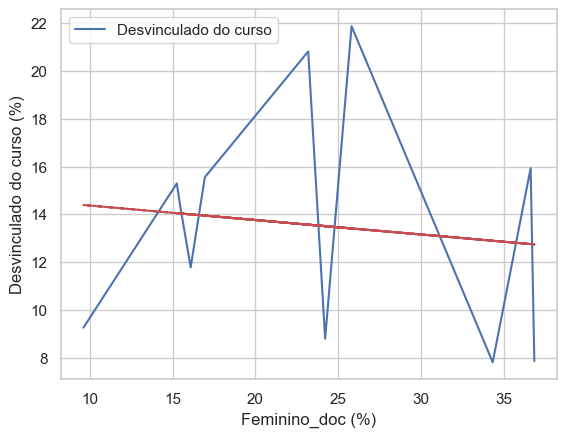

In [185]:
grafico_comparacao_linha(relacao_docente_situacao,'Feminino_doc','Desvinculado do curso')

 
0.1836 x + 10.96


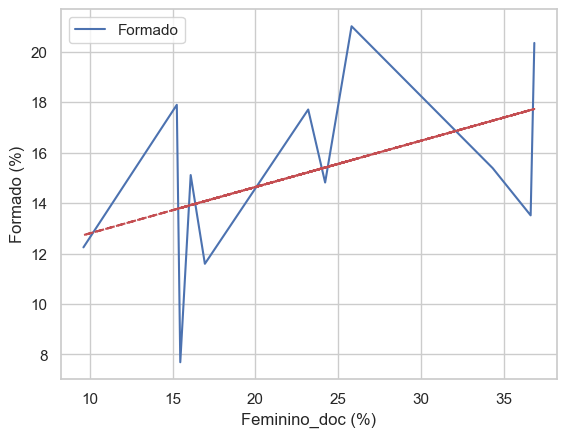

In [186]:
grafico_comparacao_linha(relacao_docente_situacao,'Feminino_doc','Formado')

#### Gráficos de relação com quantidade absoluta de mulheres docentes

In [190]:
relacao_docente_situacao_abs = data_modified_aluno_abs.join(data_modified_docente_abs.add_suffix('_doc'))
relacao_docente_situacao_abs

,Cursando,Desvinculado do curso,Formado,Matrícula trancada,Transferido para outro \n curso da mesma IES,Feminino_doc,Masculino_doc
NO_IES,,,,,,,
AMTEC,72.0,51.0,5.0,15.0,0.0,15,82
BANDTEC,191.0,38.0,64.0,8.0,1.0,23,72
COTEMIG,151.0,43.0,34.0,12.0,0.0,14,73
FACJK,76.0,52.0,34.0,47.0,2.0,18,100
FACOMP,81.0,21.0,47.0,5.0,7.0,35,60
FAETERJ\n PETRÓPOLIS,289.0,102.0,34.0,133.0,0.0,32,106
FAETERJ\nR DE JANEIRO,318.0,131.0,25.0,37.0,0.0,32,92
FATEC\n EDUVALE,40.0,10.0,6.0,7.0,0.0,5,47
FATI,13.0,5.0,2.0,0.0,0.0,23,44


In [ ]:
relacao_docente_situacao_abs

In [ ]:
# 2.Cursando
# 3. Matrícula trancada
# 4. Desvinculado do curso
# 5. Transferido para outro curso da mesma IES
# 6. Formado
# 7. Falecido
def gerar_taxa_evasao(dados_0, dados_1, genero, idade_min, idade_max):
  dados_1.dropna()
  dados_0.dropna()
  t = base_dados_genero_idade(dados_1, genero, idade_min, idade_max) # Ano de referência
  T = base_dados_genero_idade(dados_0, genero, idade_min, idade_max) # Ano de ingresso

  sum_des = t.loc[t['TP_SITUACAO'] == 4]['TP_SITUACAO'].count()
  sum_trans = t.loc[t['TP_SITUACAO'] == 5]['TP_SITUACAO'].count()
  sum_ing = sum([t.loc[t['TP_SITUACAO'] == 2]['TP_SITUACAO'].count(),
             t.loc[t['TP_SITUACAO'] == 3]['TP_SITUACAO'].count(),
             t.loc[t['TP_SITUACAO'] == 4]['TP_SITUACAO'].count(),
             T.loc[T['TP_SITUACAO'] == 4]['TP_SITUACAO'].count(),
             t.loc[t['TP_SITUACAO'] == 5]['TP_SITUACAO'].count(),
             T.loc[T['TP_SITUACAO'] == 5]['TP_SITUACAO'].count(),
             T.loc[T['TP_SITUACAO'] == 6]['TP_SITUACAO'].count(),
             t.loc[t['TP_SITUACAO'] == 6]['TP_SITUACAO'].count(),
             T.loc[T['TP_SITUACAO'] == 7]['TP_SITUACAO'].count(),
             t.loc[t['TP_SITUACAO'] == 7]['TP_SITUACAO'].count(),
            ])
  sum_fal = (T.loc[T['TP_SITUACAO'] == 7]['TP_SITUACAO'].count()) + (t.loc[t['TP_SITUACAO'] == 7]['TP_SITUACAO'].count())
  tada = (sum_des + sum_trans) / (sum_ing - sum_fal)
  return tada